In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
def load_datasets(filename):
    df = pd.read_csv(filename, delimiter=',')
    X, y = df["A"], df["B"]
    return X, y

In [3]:
def split_datasets(X, y, test_size = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [4]:
def plot_data(X_train, X_test, y_train, y_test):
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [5]:
def normalize(X):
    ##################
    # Заповнити змінні
    ##################
    
    mean = np.mean(X)
    std = np.std(X)
    X_new = (X - mean) / std
    
    return X_new, mean, std

In [6]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [7]:
def hypothesis(X, theta):
    
    ######################
    # Один рядок коду
    ######################
    
    h_thetha = np.dot(X, theta)
    
    return h_thetha

In [8]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    
    ######################
    # 1-2 рядки коду
    ######################
    
    hypo = hypothesis(X, theta)
    J = np.sum((hypo - y)**2)/(2*m)
    
    return J

In [9]:
def derivative(X, y, theta):
    m = X.shape[0]
    
    ######################
    # 1 рядок коду
    ######################
    
    d_thetha = np.dot(hypothesis(X, theta) - y, X) / m
    
    return d_thetha

In [10]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        ######################
        # Використати написані вище функції
        delta = derivative(X, y, theta)
        theta = theta - alpha*delta
        J = cost_function(X, y, theta)
        ######################
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [11]:
def plot_J(X, y):
    theta_0 = np.linspace(-20, 20, 100)
    theta_1 = np.linspace(-5, 10, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

## Основний код програми

Отримання датасетів та видрук їх параметрів.

In [12]:
X, y = load_datasets('burrito.csv')
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(97,), y=(97,)


Розбиття датасету на частини:

In [13]:
X_train, X_test, y_train, y_test = split_datasets(X, y, 0.2)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77,), y=(77,)
Test set: X=(20,), y=(20,)


Відображення тренувальних і тестових даних на графіку (для 1 змінної)

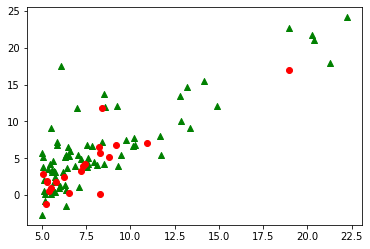

In [14]:
plot_data(X_train, X_test, y_train, y_test)

Підготовка тренувальних даних (додавання 0-колонки з одиницями). Ініціалізація параметрів регресії (0, 0): 

In [15]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0])

Для спрощення записів аліас для вектора передбачуваних значень

In [16]:
y = y_train[:]

У випадку використання ВСІХ даних для тренування (test_size=0.0), штрафна функція має повернути величину близьку до 32.072.

In [17]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (77, 2)
y: (77,)
35.831186677362986


Налаштування гіперпараметрів регресії: швидкості навчання та кількості ітерацій.

In [18]:
alpha = 0.01
num_iters = 1500

Запуск градієнтного спуску та видрук знайдених оптимальних значень на екран. У випадку використання всіх даних для тренування, результати будуть близькі до Theta 0: -3.63; Theta 1: 1.17

In [19]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))

Theta 0: 6.268515494625055; Theta 1: 4.763468772087718


Відображення штрафної функції як функції від thetha0, thetha1.

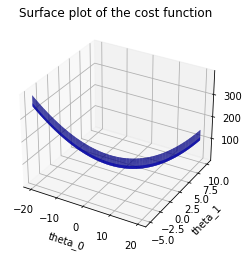

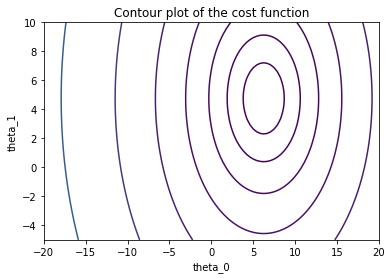

In [20]:
plot_J(X, y)

Відображення знайденої апроксимації разом із тренувальними даними.

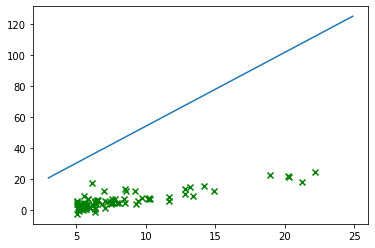

In [21]:
x = np.arange(3, 25, 0.1)
h = new_theta[0] + new_theta[1]*x

plt.plot(x, h)
plt.scatter(X_train, y_train, marker='x', c='green')

plt.show()

Оцінка похибки апроксимації на тестових даних (test_size має бути більше 0.0 та менше 1.0).

In [23]:
####################
# Нормалізувати тестовий датасет, використовуючи mean, std з тренувального
####################
X_test_proc =  (X_test.copy() - mean) / std
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

res = pd.DataFrame({'X' : X_test, 'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
print(res)
print(cost_function(X_test_proc, y_test, new_theta))

          X  y_actual     y_pred          err
96   5.4369   0.61705   2.899612   369.915296
93   5.3054   1.98690   2.744024    38.105788
89   5.0594   2.82140   2.452961    13.058724
64  18.9590  17.05400  18.898717    10.816917
86   9.1802   6.79810   7.328617     7.803906
94   8.2934   0.14454   6.279372  4244.383266
49   5.5416   1.01790   3.023491   197.032271
47   5.8014   1.84400   3.330882    80.633523
60   8.8254   5.16940   6.908824    33.648477
34   8.2111   6.54260   6.181996     5.511636
52   7.4239   4.28850   5.250595    22.434298
75   6.5479   0.29678   4.214127  1319.949957
30   5.2524  -1.22000   2.681315   319.779940
5    8.3829  11.88600   6.385266    46.279098
66   8.2951   5.74420   6.281383     9.351746
71   7.3345   4.02590   5.144818    27.793000
73   7.2259   3.34110   5.016325    50.139919
56   6.2742   2.47560   3.890291    57.145362
51   5.3077   1.83960   2.746745    49.312091
27  10.9570   7.04670   9.430895    33.834206
3.280841248679363
